# فرضیه اول
به طور میانگین قیمت اجاره‌ی هر نوع خانه‌ای در گروه محله‌ی Manhattan از بقیه محلات بیشتر است

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

In [4]:
filename = "AB_NYC_2019.csv"
data = pd.read_csv(filename)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
cols = list(data.columns)
selected_cols = ['id', 'neighbourhood_group', 'neighbourhood',
                 'latitude',	'longitude', 'price']
for c in cols:
  if c not in selected_cols:
    data = data.drop(c, axis=1)

data.tail()


,id,neighbourhood_group,neighbourhood,latitude,longitude,price
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,70
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,40
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,115
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,55
48894,36487245,Manhattan,Hell's Kitchen,40.76404,-73.98933,90


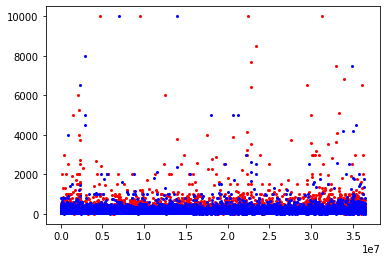

In [6]:
X = np.array(data['id'])
Y = np.array(data['price'])
is_manhattan = np.array(data['neighbourhood_group'] == 'Manhattan')

assert X.shape[0] == Y.shape[0]
assert X.shape[0] == is_manhattan.shape[0]

X_red = np.array([X[i] for i in range(X.shape[0]) if is_manhattan[i]])
Y_red = np.array([Y[i] for i in range(X.shape[0]) if is_manhattan[i]])

X_blue = np.array([X[i] for i in range(X.shape[0]) if not is_manhattan[i]])
Y_blue = np.array([Y[i] for i in range(X.shape[0]) if not is_manhattan[i]])

plt.plot(X_red, Y_red, color='red', linewidth=0,  marker='o', markersize=2)
plt.plot(X_blue, Y_blue, color='blue', linewidth=0, marker='o', markersize=2)


به نظر نمی‌أید که این فرضیه به جایی برسد. زیرا در حالت کلی  خانه‌های این گروه محله به صورت کلی قیمت های نزدیکی به سایر گروه محلات دارند.

حال سعی می‌کنیم میانگین ها‌را مقایسه کنیم.

In [56]:
neighbor_gr_mean_grouped_data = data.groupby(['neighbourhood_group']).mean()
maxprice_neigh_gr = neighbor_gr_mean_grouped_data.idxmax(0)['price']
maxprice_neigh_gr

'Manhattan'

توانستیم پرهزینه‌ترین پر هزینه ترین را پیدا کنیم. که مشخص است همان Manhattan است.
پس با این‌که این گروه محله از لحاظ قیمتی به طور میانگین از همه بالا تر است، اما بخش هایی هستند که قیمت های به نسبت پایینی دارند.

این بار سعی می‌کنیم به جای کار کردن برروی گروه محله‌ برروی محله‌ها کار کنیم. ابتدا محله‌ی پر هزینه را پیدا می‌کنیم.

In [64]:
neighbor_mean_grouped_data = data.groupby(['neighbourhood']).mean()
maxprice_neigh = neighbor_mean_grouped_data.idxmax(0)['price']
maxprice_neigh

'Fort Wadsworth'

نمودار‌ها را براساس این محله می‌کشیم.

In [47]:
X = np.array(data['id'])
Y = np.array(data['price'])
is_fort = np.array(data['neighbourhood'] == maxprice_neigh)

assert X.shape[0] == Y.shape[0]
assert X.shape[0] == is_fort.shape[0]

X_red = np.array([X[i] for i in range(X.shape[0]) if is_fort[i]])
Y_red = np.array([Y[i] for i in range(X.shape[0]) if is_fort[i]])

X_blue = np.array([X[i] for i in range(X.shape[0]) if not is_fort[i]])
Y_blue = np.array([Y[i] for i in range(X.shape[0]) if not is_fort[i]])

(1,)


در اینجا ما یک بار تنها نمودار مربوط به این محله را می‌کشیم و سپس کل را.

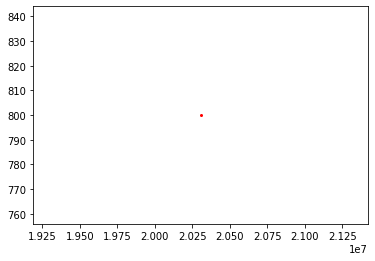

In [48]:
plt.plot(X_red, Y_red, color='red', linewidth=0,  marker='o', markersize=2)

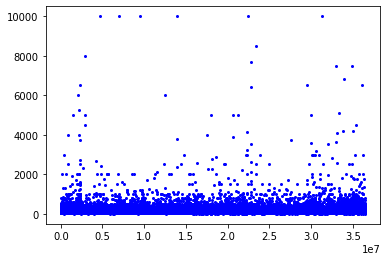

In [49]:
plt.plot(X_red, Y_red, color='red', linewidth=0,  marker='o', markersize=2)
plt.plot(X_blue, Y_blue, color='blue', linewidth=0, marker='o', markersize=2)

از این محله تنها یک خانه به اجاره می‌رود که این خانه از آنجا که از میانگین به نسبت بالاتر است در توجه ما قرار گرفته است.

یک راه دیگر برای بررسی قیمت ها در محلات استفاده از دو ویژگی زیر است:

(LATITUDE, LONGTITUDE) 

که طول و عرض جغرافیایی است.
یک نمودار میکشیم که رنگ آن نشان دهنده‌ی قیمت خانه است.

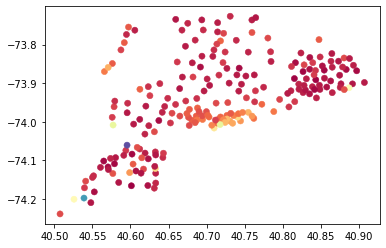

In [65]:
X = np.array(neighbor_mean_grouped_data['latitude'])
Y = np.array(neighbor_mean_grouped_data['longitude'])
C = np.array(neighbor_mean_grouped_data['price'])

plt.scatter(X, Y, marker='.', s=150, linewidths=1, c=C, cmap=plt.cm.get_cmap('Spectral'))
plt.show()

در نمودار زیر هم سعی کردیم، خانه‌هایی که در محله‌های Manhattan است را به مجزا کنیم تا با بالا قابل مقایسه باشد.


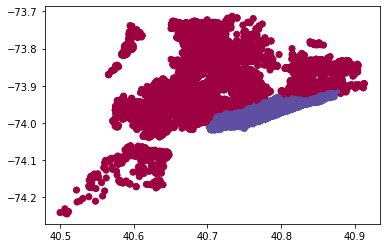

In [66]:
X = np.array(data['latitude'])
Y = np.array(data['longitude'])
C = np.array(data['neighbourhood_group'] == 'Manhattan')

plt.scatter(X, Y, marker='.', s=150, linewidths=1, c=C, cmap=plt.cm.get_cmap('Spectral'))
plt.show()